# Multiple rois

If you have multiple rois in your roi file, you can use it almost out of the box like in the regular case. Here we reproduce the analysis seen in the [first part](intensity_by_sector.ipynb) and highlight places where you can explicitly use roi options:

In [1]:
#%load_ext autoreload
#%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io

import matplotlib
cmap = matplotlib.colors.ListedColormap(np.random.rand(256,3))

from microfilm.dataset import MultipageTIFF
import microfilm.microplot
from splitmask import splitmask

In [3]:
image_path = '../splitmask/tests/test_folders/test_multipage_good/'
roi_path = '../splitmask//tests/test_folders/test_multipage_good/multiroi.bmp'

In [4]:
image = MultipageTIFF(image_path)
roi = skimage.io.imread(roi_path)

cm = splitmask.get_roi_cm(roi_im=roi)
im_np = image.load_frame(channel_name=image.channel_name[1], frame=20)

Here the center of mass contains now multiple coordinates:

In [5]:
cm

array([[ 30,  90],
       [ 90,  50],
       [ 90, 130],
       [130,  80]], dtype=uint16)

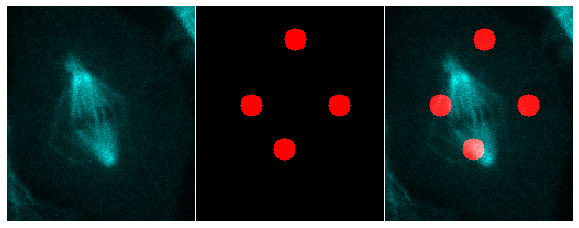

In [6]:
panel = microfilm.microplot.Micropanel(1,3, figscaling=3)
panel.add_element(pos = [0,0], microim=microfilm.microplot.Microimage(im_np, cmaps=['pure_cyan']))
panel.add_element(pos = [0,1], microim=microfilm.microplot.Microimage(roi))
panel.add_element(pos = [0,2], microim=microfilm.microplot.Microimage([im_np, roi],['pure_cyan', 'pure_red']))

Defining sectors is done as previously. The construction of sector masks also is identical:

In [7]:
sector_width = 5
num_sectors = 10

In [8]:
radius_labels = splitmask.create_concentric_mask(center=cm, im_dims=image.dims,
                                                         sector_width=sector_width, num_sectors=num_sectors)
colors_rad, cmap_rad = splitmask.get_cmap_labels(radius_labels, cmap_name='cool')

The differences is that now the mask containing the sectors contains multiple planes, one for each roi. We can show it in composite color mode:

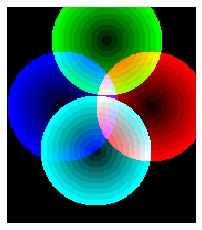

In [9]:
cmaps = ['pure_green', 'pure_blue', 'pure_red', 'pure_cyan']
microfilm.microplot.microshow(radius_labels, cmaps=cmaps);

The same goes for the angular sectors:

In [10]:
angular_width = 20
max_rad =50
sector_labels = splitmask.create_sector_mask(center=cm, im_dims=image.dims,
                                                     angular_width=angular_width, max_rad=max_rad)

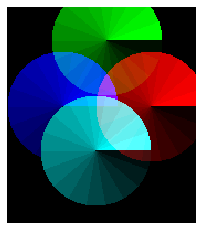

In [11]:
microfilm.microplot.microshow(sector_labels, cmaps=cmaps);

Extracting intensities also works as previously. Only now the output contains multiple rois instead of just one:

In [12]:
channel = [image.channel_name[0], image.channel_name[1]]
signal_radius = splitmask.measure_intensities(time_image=image, channels=channel, 
                                                      im_labels=radius_labels,max_time=51)

In [13]:
signal_radius

<xarray.DataArray (time: 51, sector: 10, channel: 2, roi: 4)>
array([[[[ 2555.39130435,  2877.92753623,  2684.76811594,
           3564.44927536],
         [ 3346.33333333,  4520.69565217,  3370.47826087,
          10953.05797101]],

        [[ 2580.38559322,  2871.68220339,  2717.47457627,
           3543.95762712],
         [ 3318.83050847,  4669.70338983,  3405.48305085,
           8411.69067797]],

        [[ 2598.95153061,  2910.33418367,  2708.97704082,
           4289.15306122],
         [ 3456.10714286,  5100.46428571,  3466.20408163,
           7591.8877551 ]],

        ...,

        [[ 2569.92667375,  4387.53583618,  4098.87969283,
           3348.4496587 ],
         [ 4931.76939426,  5704.15273038,  4176.88054608,
...
           3341.31122449],
         [ 3103.03571429,  4027.375     ,  3006.40306122,
           5217.68622449]],

        ...,

        [[ 2462.93517535,  2655.11518771,  2559.97269625,
           2715.72013652],
         [ 3283.67162593,  3881.6996587 ,  3085.5887372 ,
           3794.49914676]],

        [[ 2431.29534192,  2630.4752994 ,  2521.18852459,
           2594.68712575],
         [ 3508.43607532,  3902.67664671,  3240.58196721,
           3684.13697605]],

        [[ 2388.43286385,  2593.66463415,  2525.34454471,
           2479.54810298],
         [ 3694.34084507,  3941.11856369,  3382.55783429,
           3548.37127371]]]])
Dimensions without coordinates: time, sector, channel, roi

When we plot the results, we now get the additional option of specifying which roi we want to use via the ```roi``` parameter:

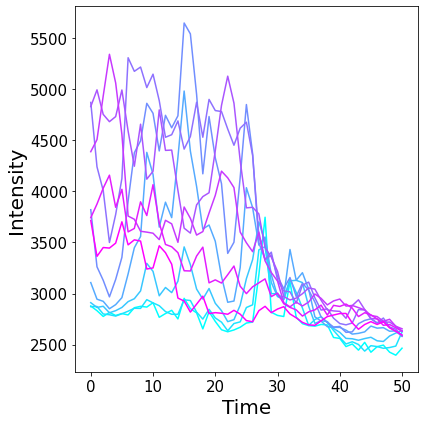

In [14]:
myplot = splitmask.plot_signals(signal_radius, channel=0, roi=1, color_array=colors_rad);

The same goes for the ```plot_sectors``` function which also has a ```roi``` parameter:

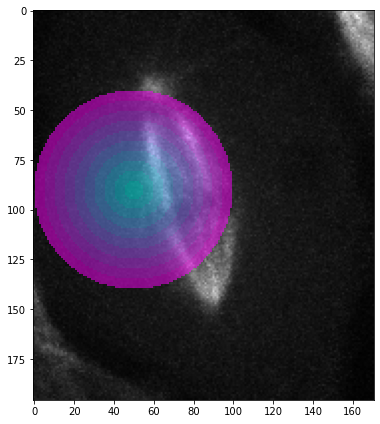

In [15]:
splitmask.plot_sectors(image, radius_labels, time=10, roi=1, cmap=cmap_rad, channel=image.channel_name[1]);

Finally, when we save the extracted signals, each intensity is also asisgned a roi index. In order to know which index corresponds to which roi, you can save the labelled roi image:

In [16]:
splitmask.save_labelled_roi('labelled_roi2.tif', roi_im=roi)